In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from nengo_extras.plot_spikes import (
    plot_spikes,
    preprocess_spikes,
)

## Generate Spike Plots

We saved a different file for testing each numbers of actions. Fill in how many actions were tested.

In [15]:
n_actions = 6

Fetch the npz data file for that experiment - unique filenames are generated whenever the experiment is run, make sure the path to the file is correct for your files on your system. 

In [16]:
allData=[]

## load the npz data file
## different path for each number of actions tested
if n_actions == 3:
    ## 3 actions
    arr = np.load('..\\data\\spikes\\BGTrial#20240126-154554-f7c706e4.npz', allow_pickle=True) ## put in path to your data file
elif n_actions == 6:
    ## 6 actions
    arr = np.load('..\\data\\spikes\\BGTrial#20240126-165527-d14e9873.npz', allow_pickle=True)
elif n_actions == 20:
    ## 20 actions
    arr = np.load('..\\data\\spikes\\BGTrial#20240411-124248-96557018.npz', allow_pickle=True)

vals=[] ## list for storing data
header = arr.files ## column headers
df = pd.DataFrame(header) ## create an empty data frame

for item in arr.files:
    vals.append(arr[item]) ## fetch the data from the npz file

## put the data into another list
allData.append(vals)

## convert to data frame
df = pd.DataFrame(allData, columns=header)

Generate the plot for figures 2 and 3

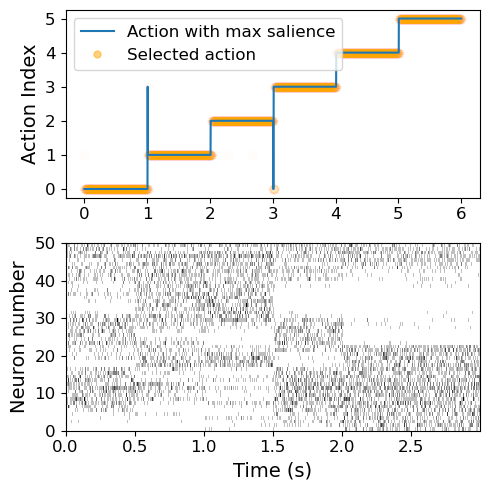

In [17]:
## retrieve the saliences 
sals = df['saliences'][0]

## initialise figure
fig,axs = plt.subplots(2,1,figsize=(5,5))

## Plot the chosen action against the desired action
## df['input_actions] = desired action, df['decoded_actions'] = chosen action
axs[0].plot(np.arange(0, len(sals), 0.001), df['input_actions'][0].argmax(axis=1), label='Action with max salience')
axs[0].scatter(np.arange(0, len(sals), 0.001), df['decoded_actions'][0], alpha=0.01, color='orange', label='Selected action')
## create markers to be shown in the legend
blue_line = mlines.Line2D([], [], color='#1f77b4', marker='None', linestyle='-',
                          markersize=10, label='Action with max salience')
orange_dot = mlines.Line2D([], [], color='orange', alpha=0.5, marker='.', linestyle='None',
                          markersize=10, label='Selected action')
## create legend
axs[0].legend(handles=[blue_line,orange_dot], fontsize=12)
## axis and tick labels
axs[0].set_ylabel("Action Index", fontsize=14)
axs[0].set_yticks(np.arange(0, n_actions, 1))
axs[0].tick_params('both', labelsize=12)

## Plot the spikes of 50 neurons from GPi as a raster plot
plot_spikes(*preprocess_spikes(np.arange(0, 3, 0.001), df['spikes'][0]), ax=axs[1])
axs[1].set_xlabel("Time (s)", fontsize = 14)
axs[1].set_ylabel("Neuron number", fontsize = 14)

## tick params
axs[1].tick_params('both', labelsize=12)
fig.tight_layout()

## save the figure as pdf
if n_actions == 3:
    plt.savefig('.\\figs\\spikes_3actions.pdf')
elif n_actions == 6:
    plt.savefig('.\\figs\\spikes_6actions.pdf')

Let's also have a look at the order of saliences on each trial. This plot was not used in the paper. 

Text(0, 0.5, 'Decoded Salience')

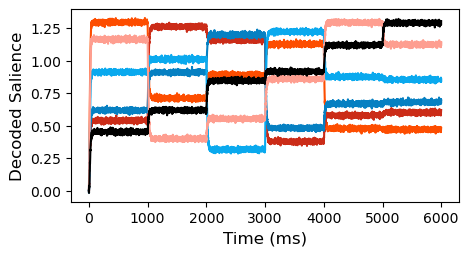

In [18]:
fig = plt.figure(figsize=(5,2.5))
plt.plot(df['decoded_saliences'][0][:,0], color = '#fd4d00')
plt.plot(df['decoded_saliences'][0][:,1], color = '#cb2c18')
plt.plot(df['decoded_saliences'][0][:,2], color = '#0680c2')
if n_actions != 3:
    plt.plot(df['decoded_saliences'][0][:,3], color = '#0aa9ee')
    plt.plot(df['decoded_saliences'][0][:,4], color = '#fe9e90')
    plt.plot(df['decoded_saliences'][0][:,5], color = 'black')

plt.xlabel('Time (ms)', fontsize = 12)
plt.ylabel('Decoded Salience', fontsize = 12)